<a href="https://colab.research.google.com/github/Parikshith29/JustPublic/blob/main/AILabInternals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

def is_safe(board, row, col, n):
    # Check if there is a queen in the same column
    for i in range(row):
        if board[i][col] == 1:
            return False

    # Check upper-left diagonal
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    # Check upper-right diagonal
    for i, j in zip(range(row, -1, -1), range(col, n)):
        if board[i][j] == 1:
            return False

    return True


def solve_n_queens(board, row, n):
    if row == n:
        return True

    for col in range(n):
        if is_safe(board, row, col, n):
            board[row][col] = 1
            if solve_n_queens(board, row + 1, n):
                return True
            board[row][col] = 0

    return False


def print_board(board):
    for row in board:
        print(' '.join(['Q' if cell == 1 else '.' for cell in row]))


def n_queens(n):
    board = [[0 for _ in range(n)] for _ in range(n)]

    # Place the first queen in the first row, and start backtracking
    if solve_n_queens(board, 0, n):
        print_board(board)
    else:
        print("No solution found.")


# Example usage:
n_queens(8)

Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .


In [ ]:

def print_board(board):
  print('-------------')
  for i in range(3):
    print('|', end=' ')
    for j in range(3):
      print(board[i*3+j], end=' | ')
    print('\n-------------')

def check_win(board, player):
  win_conditions = [(0, 1, 2), (3, 4, 5), (6, 7, 8),  # horizontal
                   (0, 3, 6), (1, 4, 7), (2, 5, 8),  # vertical
                   (0, 4, 8), (2, 4, 6)]           # diagonal
  for i in win_conditions:
    if board[i[0]] == board[i[1]] == board[i[2]] == player:
      return True
  return False

def is_board_full(board):
  return ' ' not in board

def tic_tac_toe():
  board = [' '] * 9
  players = ['X', 'O']
  current_player = 0

  while True:
    print_board(board)
    move = int(input(f"Player {players[current_player]}, enter your move (1-9): ")) - 1

    if not (0 <= move <= 8) or board[move] != ' ':
      print("Invalid move. Try again.")
      continue

    board[move] = players[current_player]

    if check_win(board, players[current_player]):
      print_board(board)
      print(f"Player {players[current_player]} wins!")
      break
    elif is_board_full(board):
      print_board(board)
      print("It's a tie!")
      break

    current_player = (current_player + 1) % 2

if __name__ == "__main__":
  tic_tac_toe()

-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
Player X, enter your move (1-9): 5
-------------
|   |   |   | 
-------------
|   | X |   | 
-------------
|   |   |   | 
-------------
Player O, enter your move (1-9): 3
-------------
|   |   | O | 
-------------
|   | X |   | 
-------------
|   |   |   | 
-------------
Player X, enter your move (1-9): 9
-------------
|   |   | O | 
-------------
|   | X |   | 
-------------
|   |   | X | 
-------------
Player O, enter your move (1-9): 2
-------------
|   | O | O | 
-------------
|   | X |   | 
-------------
|   |   | X | 
-------------
Player X, enter your move (1-9): 1
-------------
| X | O | O | 
-------------
|   | X |   | 
-------------
|   |   | X | 
-------------
Player X wins!


In [ ]:
import sys

def nearest_neighbor_tsp(distances):
    num_cities = len(distances)
    tour = [0]
    visited = set([0])
    current_city = 0
    total_distance = 0

    while len(visited) < num_cities:
        nearest_city = None
        min_distance = sys.maxsize

        for next_city in range(num_cities):
            if next_city not in visited and distances[current_city][next_city] < min_distance:
                nearest_city = next_city
                min_distance = distances[current_city][next_city]

        tour.append(nearest_city)
        visited.add(nearest_city)
        total_distance += min_distance
        current_city = nearest_city

    tour.append(0)
    total_distance += distances[current_city][0]

    return tour, total_distance

if __name__ == "__main__":
    distances = [
        [0, 4, 8, 9, 12],
        [4, 0, 6, 8, 9],
        [8, 6, 0, 10, 11],
        [9, 8, 10, 0, 7],
        [12, 9, 11, 7, 0]
    ]

    tour, total_distance = nearest_neighbor_tsp(distances)

    print("Nearest Neighbor TSP Tour:", tour)
    print("Total Distance:", total_distance)

Nearest Neighbor TSP Tour: [0, 1, 2, 3, 4, 0]
Total Distance: 39


In [ ]:
def forward_chaining(rules, facts, goal):
    inferred_facts = set(facts)
    new_facts = True

    while new_facts:
        new_facts = False

        for rule in rules:
            condition, result = rule

            if all(cond in inferred_facts for cond in condition) and result not in inferred_facts:
                inferred_facts.add(result)
                new_facts = True

            if result == goal:
                return True

    return False

def backward_chaining(rules, facts, goal):
    def ask(query):
        if query in facts:
            return True

        for rule in rules:
            condition, result = rule
            if result == query and all(ask(cond) for cond in condition):
                return True

        return False

    return ask(goal)

rules = [
    (['hair', 'live young'], 'mammal'),
    (['feathers', 'fly'], 'bird')
]

facts = ['hair', 'live young']
goal = 'mammal'
is_mammal = forward_chaining(rules, facts, goal)

if is_mammal:
    print("The cat is classified as a mammal.")
else:
    print("The cat is not classified as a mammal.")

facts = ['feathers', 'fly']
goal = 'bird'
is_bird = backward_chaining(rules, facts, goal)

if is_bird:
    print("The pigeon is classified as a bird.")
else:
    print("The pigeon is not classified as a bird.")

The cat is classified as a mammal.
The pigeon is classified as a bird.


Enter start node: S
Enter stop node: G
Path found: ['S', 'C', 'D', 'E', 'G']
Path: ['S', 'C', 'D', 'E', 'G']


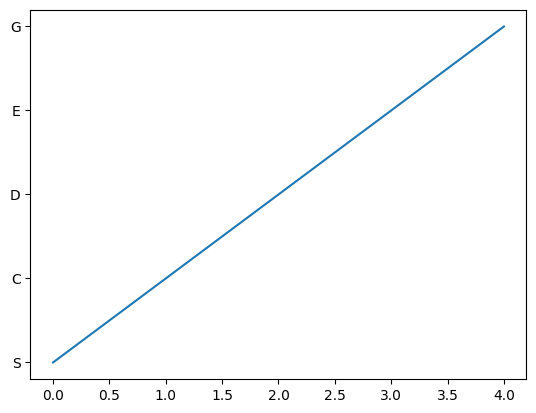

In [ ]:
import matplotlib.pyplot as plt

def a_star(graph, start, stop):
    open_set = {start}
    closed_set = set()
    g = {start: 0}
    parents = {start: start}

    while open_set:
        n = min(open_set, key=lambda x: g[x] + heuristic(x))

        if n == stop or graph[n] is None:
            break

        for m, weight in graph[n]:
            if m not in open_set and m not in closed_set:
                open_set.add(m)
                parents[m] = n
                g[m] = g[n] + weight
            elif g[m] > g[n] + weight:
                g[m] = g[n] + weight
                parents[m] = n
                if m in closed_set:
                    closed_set.remove(m)
                    open_set.add(m)

        open_set.remove(n)
        closed_set.add(n)

    else:
        print('Path does not exist!')
        return None

    path = []
    while n != start:
        path.append(n)
        n = parents[n]

    path.append(start)
    path.reverse()
    print('Path found:', path)
    return path

def heuristic(n):
    H_dist = {
        'S': 14,
        'B': 12,
        'C': 11,
        'D': 6,
        'E': 4,
        'F': 11,
        'G': 0
    }
    return H_dist[n]

graph = {
    'S': [('B', 4), ('C', 3)],
    'B': [('E', 12), ('F', 11)],
    'C': [('D', 7), ('E', 10)],
    'D': [('E', 2)],
    'E': [('G', 5)],
    'F': [('G', 16)]
}

start = input("Enter start node: ")
stop = input("Enter stop node: ")

path = a_star(graph, start, stop)

if path:
    print("Path:", path)
    plt.plot(path)
    plt.show()